# Validation - stellar evolution

Generates the plots presented in SynthPop Paper 1, Section 6.3

Macy Huston & Jonas Klüter

In [39]:
# Imports
import sys
import os
import numpy as np
import pandas
import matplotlib.pyplot as plt
import pandas as pd
from synthpop.modules.evolution.mist import MIST
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

columns = ["EEP","UBVRIplus", "log10_isochrone_age_yr", "initial_mass", "[Fe/H]_init", "phase", 'star_mass']
mist = MIST(columns)
mist4 = mist.read_csv("mist_web_interpolator/pop4.cmd")
mist5 = mist.read_csv("mist_web_interpolator/pop5.cmd")
mist6 = mist.read_csv("mist_web_interpolator/pop6.cmd")

import synthpop

def get_color_iter(n):
    return iter(['red', 'green', 'blue', 'gold'])

In [6]:
# SynthPop Configuration
config = {
    "name_for_output":"validation_model",
    "model_name": "validation_model",
    "l_set": [0,90, 12.17, 39.14],
    "max_distance":25,
    "b_set":[0, 0, 5.37, 8.53],
    "l_set_type":"pairs",
    "b_set_type":"pairs",
    "solid_angle":[1e-4,3e-2,1e-3, 1e-2],
    "extinction_map_kwargs": {
        "name":"MapsFromDustmaps", "dustmap_name":"marshall"
        },
    "output_file_type":"hdf5",
    "obsmag": False,
    "chosen_bands": ["Bessell_B", "Bessell_V", "Bessell_I"],
    "maglim": ["Bessell_V", 99999, "keep"],
    "lost_mass_option": 1,
    "overwrite":True
}

# set up SynthPop model
model = synthpop.SynthPop(**config)
# initialize populations
model.init_populations()



################################ Settings #################################
 170021 - # reading default parameters from
 170022 - default_config_file =  /u/mhuston/code/synthpop/synthpop/config_files/_default.synthpop_conf 


# copy the following to a config file to redo this model generation -------
 170030 - {
    "l_set": [
        0,
        90,
        12.17,
        39.14
    ],
    "l_set_type": "pairs",
    "b_set": [
        0,
        0,
        5.37,
        8.53
    ],
    "b_set_type": "pairs",
    "name_for_output": "validation_model",
    "model_name": "validation_model",
    "solid_angle": [
        0.0001,
        0.03,
        0.001,
        0.01
    ],
    "solid_angle_unit": "deg^2",
    "random_seed": 130223054,
    "sun": {
        "x": -8.178,
        "y": 0.0,
        "z": 0.017,
        "u": 12.9,
        "v": 245.6,
        "w": 7.78,
        "l_apex_deg": 56.24,
        "b_apex_deg": 22.54
    },
    "lsr": {
        "u_lsr": 1.8,
        "v_lsr": 233.4,
  

In [4]:
# SynthPop Catalog Generation

# place to collect the data from different line of sights
data = {}
# loop over all location
for i,loc in enumerate(model.get_iter_loc()):
    # run synthpop for the given location and solid angle
    data_loc, distribution = model.process_location(
        *loc, model.parms.solid_angle[i], model.parms.solid_angle_unit,
        save_data=False)

    # store data in the dictionary
    data[loc] = data_loc
combined_data = pandas.concat([d for d in data.values()])



############################# update location #############################
 73677 - # set location to: 
 73679 - l, b = (0.00 deg, 0.00 deg)
 73681 - # set solid_angle to:
 73683 - solid_angle = 1.000e-04 deg^2


############################# Generate Field ##############################


# Population 0;  test_population_0 ----------------------------------------
 78087 - # From density profile (number density)
 78089 - expected_total_iMass = 11035.7572
 78091 - expected_total_eMass = 5921.8090
 78093 - average_iMass_per_star = 0.6045
 78095 - mass_loss_correction = 0.5366
 78097 - n_expected_stars = 18256.1418
 78102 - # Determine velocities when position are generated 
 78852 - # From Generated Field:
 78854 - generated_stars = 18408
 78856 - generated_total_iMass = 11089.7806
 78866 - generated_total_eMass = 5907.6062
 78868 - det_mass_loss_corr = 0.5327
 78932 - # Done


# Population 1;  test_population_1 ----------------------------------------
 79706 - # From density profile 

In [14]:
ccycle = ['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628', '#984ea3', '#999999', '#e41a1c', '#dede00']

In [45]:
# Collect the stars for each population we are examining
pop4 = combined_data[combined_data['pop']==4]
pop5 = combined_data[combined_data['pop']==5]
pop6 = combined_data[combined_data['pop']==6]

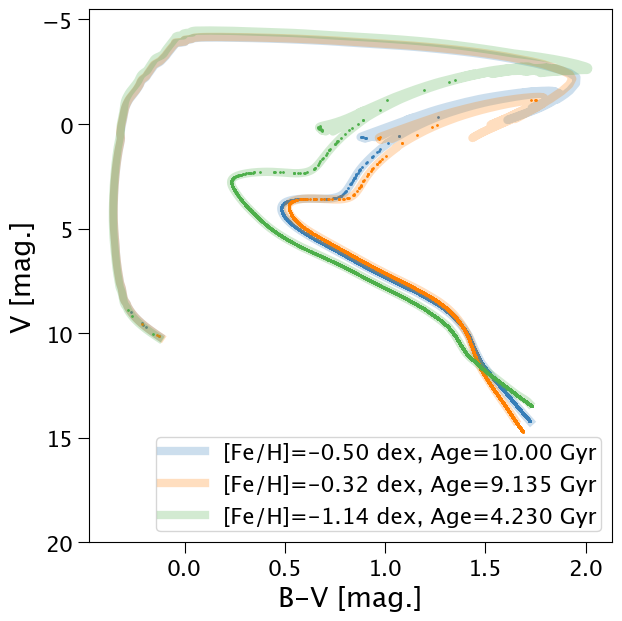

In [73]:
# Plot the CMD of our stars and the MIST web interpolator isochrones
plt.figure(figsize=(6.5,6.5))
plt.plot(mist4.Bessell_B - mist4.Bessell_V, mist4.Bessell_V, c=ccycle[0], linewidth=6, alpha=0.25, label='[Fe/H]=-0.50 dex, Age=10.00 Gyr')
plt.plot(pop4.Bessell_B - pop4.Bessell_V, pop4.Bessell_V, c=ccycle[0], marker='.', linestyle='none', markersize=2)
plt.plot(mist5.Bessell_B - mist5.Bessell_V, mist5.Bessell_V, c=ccycle[1], linewidth=6, alpha=0.25, label='[Fe/H]=-0.32 dex, Age=9.135 Gyr')
plt.plot(pop5.Bessell_B - pop5.Bessell_V, pop5.Bessell_V, c=ccycle[1], marker='.', linestyle='none', markersize=2)
plt.plot(mist6.Bessell_B - mist6.Bessell_V, mist6.Bessell_V, c=ccycle[2], linewidth=6, alpha=0.25, label='[Fe/H]=-1.14 dex, Age=4.230 Gyr')
plt.plot(pop6.Bessell_B - pop6.Bessell_V, pop6.Bessell_V, c=ccycle[2], marker='.', linestyle='none', markersize=2)
plt.legend(loc=4)
plt.xlabel('B-V [mag.]'); plt.ylabel('V [mag.]')
plt.ylim(20,-5.5)
plt.tight_layout()
plt.savefig('validation_figures/evolution_cmd.png')